# `House Price Prediction`

### Importing Libraries

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Importing the Dataset

In [204]:
df = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [205]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [207]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [208]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## 2) Data Preprocessing

### Checking Null Values

<AxesSubplot: >

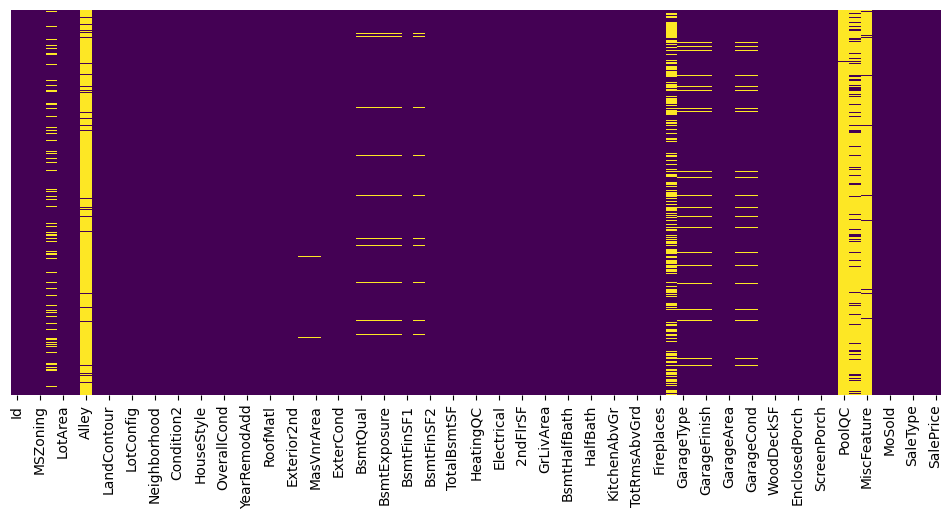

In [209]:
# Create a heatmap to check null values
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### Dropping Columns with too many Null Values

In [210]:
def drop_null_columns(df, test, threshold):

    null_columns = df.columns[df.isnull().mean() > threshold]
    df.drop(null_columns, axis=1, inplace=True)
    test.drop(null_columns, axis=1, inplace=True)
    return df, test


df, test = drop_null_columns(df, test, 0.01)

In [211]:
df = df.drop(["Id"], axis=1)

test_id = test["Id"]
test = test.drop(["Id"], axis=1)

<AxesSubplot: >

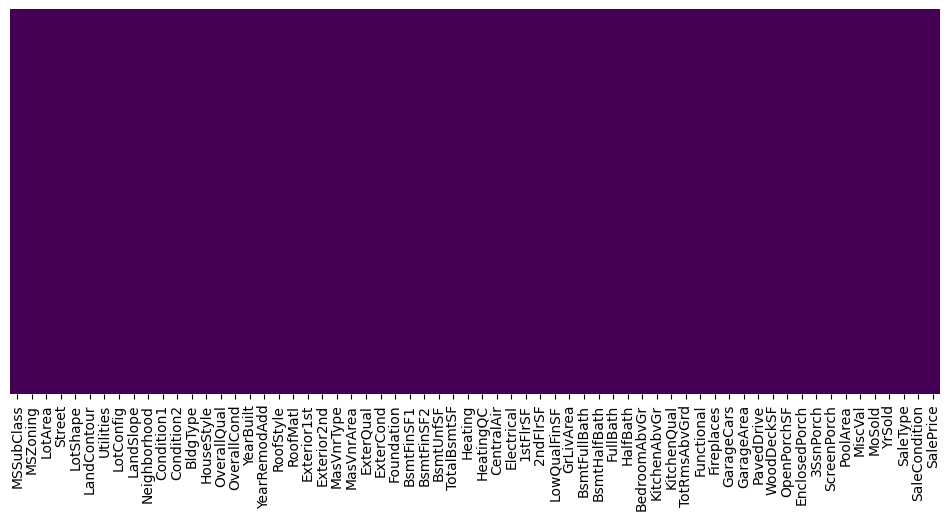

In [212]:
# Create a heatmap to check null values
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [213]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [214]:
test.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


### Label Encoding all object columns

In [215]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

object_columns = df.select_dtypes(include="object").columns
for column in object_columns:
    df[column] = le.fit_transform(df[column])
    test[column] = le.fit_transform(test[column])

In [216]:
df.fillna(df.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [217]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


In [218]:
test.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,11622,1,3,3,0,4,0,12,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,14267,1,0,3,0,0,0,12,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,13830,1,0,3,0,4,0,8,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,9978,1,0,3,0,4,0,8,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,5005,1,0,1,0,4,0,22,...,82,0,0,144,0,0,1,2010,8,4


## 3) Building the Model

### Splitting into Train and Test

In [219]:
from sklearn.model_selection import train_test_split
X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [220]:
X_train.shape, X_test.shape

((1168, 63), (292, 63))

In [221]:
y_train.shape, y_test.shape

((1168,), (292,))

### Linear Regression

In [222]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [223]:
model.fit(X_train, y_train)

LinearRegression()

### Deep Learning Model

In [224]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,3,8400,1,3,3,0,4,0,12,...,0,0,0,0,0,0,6,2010,8,4
1066,60,3,7837,1,0,3,0,4,0,8,...,40,0,0,0,0,0,5,2009,8,4
638,30,3,8777,1,3,3,0,4,0,7,...,0,164,0,0,0,0,5,2008,8,4
799,50,3,7200,1,3,3,0,0,0,18,...,0,264,0,0,0,0,6,2007,8,4
380,50,3,5000,1,3,3,0,4,0,18,...,0,242,0,0,0,0,5,2010,8,4


In [225]:
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()

model2.add(Dense(64, activation="relu"))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(64, activation="relu"))

model2.add(Dense(1))

model2.compile(optimizer="adam", loss="mse")

In [226]:
model2.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=32,
          epochs=400)

Epoch 1/400
37/37 [==============================] - 1s 8ms/step - loss: 36206931968.0000 - val_loss: 30601723904.0000
Epoch 2/400
37/37 [==============================] - 0s 6ms/step - loss: 17785604096.0000 - val_loss: 6587538944.0000
Epoch 3/400
37/37 [==============================] - 0s 5ms/step - loss: 8531928064.0000 - val_loss: 5385614848.0000
Epoch 4/400
37/37 [==============================] - 0s 5ms/step - loss: 5922428928.0000 - val_loss: 4502969856.0000
Epoch 5/400
37/37 [==============================] - 0s 5ms/step - loss: 4430958592.0000 - val_loss: 4515285504.0000
Epoch 6/400
37/37 [==============================] - 0s 5ms/step - loss: 3852729856.0000 - val_loss: 4020460288.0000
Epoch 7/400
37/37 [==============================] - 0s 5ms/step - loss: 3407606528.0000 - val_loss: 3845578496.0000
Epoch 8/400
37/37 [==============================] - 0s 5ms/step - loss: 3152254976.0000 - val_loss: 3577895168.0000
Epoch 9/400
37/37 [==============================] - 0s 5ms/s

## 4) Evaluating the Model

### Linear Regression

In [227]:
model_score_train = model.score(X_train, y_train)
model_score_train

0.8346288523690194

In [228]:
model_score_test = model.score(X_test, y_test)
model_score_test

0.8514605372699977

In [229]:
predictions = model.predict(X_test)

In [230]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

1139346133.7794316

In [231]:
rmse = np.sqrt(mse)
rmse

33754.20172037004

### Deep Learning Model

In [232]:
predictions = model2.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [233]:
mse = mean_squared_error(y_test, predictions)
mse

905403420.0358222

In [234]:
rmse = np.sqrt(mse)
rmse

30089.92223379486

## 5) Predicting the Test Set

In [235]:
predictions = model.predict(test).reshape(1459,)

46/46 [==============================] - 0s 2ms/step


In [236]:
output_df = pd.DataFrame({"Id": test_id, "SalePrice": predictions})

In [237]:
output_df.head()

,Id,SalePrice
0,1461,127313.812500
1,1462,189820.250000
2,1463,191650.328125
3,1464,200403.953125
4,1465,177508.250000


In [238]:
output_df.to_csv("./My_Submissions/submission.csv", index=False)